## $\chi^2$ 

__Lets generate Poisson sample of different ${\bf{n}}$ with ${\bf{\lambda = 5}}$:__


In [47]:
from scipy.stats import laplace,poisson
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
import seaborn as sns
sns.set()
import pandas as pd 
import scipy.stats as sts
import math

In [48]:
p_lambda = 5


Let's get unique values and their frequency

In [49]:
sample_1000 = poisson.rvs(p_lambda, size=1000)
UniqueVal, CountFreq = np.unique(sample_1000, return_counts = True)
df = pd.DataFrame({'k': UniqueVal,'n_k':CountFreq})
def probs_pois(x):
    d = list(map(lambda z: ((5**z* np.exp(-5))/math.factorial(z)),x))
    return d
df['pbility_k'] = probs_pois(UniqueVal)
indexNam = df[df['n_k']<0.002*(df['n_k'].sum())].index
df.drop(indexNam , inplace=True)
df['npbility_k'] = df['n_k'].sum()*df['pbility_k']
df['xi'] = (df['n_k']-df['npbility_k'])**2/df['npbility_k']
print(df['xi'].sum())
print(len(df['k'])- 1 )
df

22.492073309952232
11


,k,n_k,pbility_k,npbility_k,xi
1,1,21,0.033690,33.656045,4.759189
2,2,79,0.084224,84.140113,0.314009
3,3,117,0.140374,140.233522,3.849269
4,4,167,0.175467,175.291902,0.392235
5,5,184,0.175467,175.291902,0.432598
6,6,167,0.146223,146.076585,2.996985
7,7,127,0.104445,104.340418,4.920976
8,8,75,0.065278,65.212761,1.468885
9,9,34,0.036266,36.229312,0.137177
10,10,13,0.018133,18.114656,1.444118


10000

In [53]:
sample_10000 = poisson.rvs(p_lambda, size=10000)
UniqueVal, CountFreq = np.unique(sample_10000, return_counts = True)
df = pd.DataFrame({'k': UniqueVal,'n_k':CountFreq})

def probs_pois(x):
    d = list(map(lambda z: ((5**z* np.exp(-5))/math.factorial(z)),x))
    return d

df['pbility_k'] = probs_pois(UniqueVal)
indexNam = df[df['n_k']<0.001*(df['n_k'].sum())].index
df.drop(indexNam , inplace=True)
df['npbility_k'] = df['n_k'].sum()*df['pbility_k']
df['xi'] = (df['n_k']-df['npbility_k'])**2/df['npbility_k']
print(df['xi'].sum())
print(len(df['k'])- 1 )
df 

14.179275018179702
12


,k,n_k,pbility_k,npbility_k,xi
0,0,62,0.006738,67.285139,0.415139
1,1,343,0.033690,336.425694,0.128473
2,2,869,0.084224,841.064234,0.927880
3,3,1354,0.140374,1401.773724,1.628172
4,4,1860,0.175467,1752.217155,6.629967
5,5,1764,0.175467,1752.217155,0.079234
6,6,1437,0.146223,1460.180962,0.368007
7,7,1045,0.104445,1042.986401,0.003887
8,8,614,0.065278,651.866501,2.199640
9,9,339,0.036266,362.148056,1.479595


100000

In [54]:
sample_100000 = poisson.rvs(p_lambda, size=100000)
UniqueVal, CountFreq = np.unique(sample_100000, return_counts = True)
df = pd.DataFrame({'k': UniqueVal,'n_k':CountFreq})
def probs_pois(x):
    d = list(map(lambda z: ((5**z* np.exp(-5))/math.factorial(z)),x))
    return d
df['pbility_k'] = probs_pois(UniqueVal)
indexNam = df[df['n_k']<0.001*(df['n_k'].sum())].index
df.drop(indexNam , inplace=True)
df['npbility_k'] = df['n_k'].sum()*df['pbility_k']
df['xi'] = (df['n_k']-df['npbility_k'])**2/df['npbility_k']

print(df['xi'].sum())
print(len(df['k'])- 1 )

df

10.323462701205685
13


,k,n_k,pbility_k,npbility_k,xi
0,0,691,0.006738,673.329782,0.463720
1,1,3364,0.033690,3366.648908,0.002084
2,2,8306,0.084224,8416.622270,1.453943
3,3,14245,0.140374,14027.703783,3.366028
4,4,17593,0.175467,17534.629728,0.194306
5,5,17463,0.175467,17534.629728,0.292611
6,6,14549,0.146223,14612.191440,0.273276
7,7,10350,0.104445,10437.279600,0.729858
8,8,6626,0.065278,6523.299750,1.616872
9,9,3622,0.036266,3624.055417,0.001166


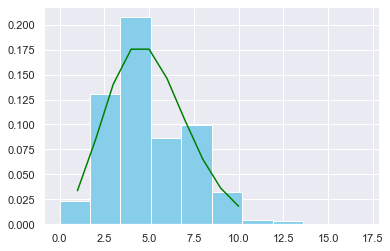

In [12]:
pmf_10 = np.arange(poisson.ppf(0.01, p_lambda), poisson.ppf(0.99, p_lambda))
plt.hist(sample_100000
         ,density=True,
               label='histogram',
               color="skyblue")
plt.gca().plot(pmf_10,
               poisson.pmf(pmf_10, p_lambda),
               color='green')
b

In [55]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def exp_m(n,lam):
    T_m = []
    la = lam
    for i in range(n):
        T = np.random.random_sample() #случайная величина из равномерного распределения
        xi = -math.log(T)/la #случайная величина распределенная экспоненциально(получена с помощью обратной функции)
        T_m.append(xi)
    return(T_m)

In [56]:
g1=exp_m(100000,0.7)

In [57]:
hist, bin_edges = np.histogram(g1, bins = 'doane')

In [58]:
hist

array([35830, 22546, 14799,  9534,  6035,  4076,  2520,  1662,  1077,
         670,   417,   293,   199,   123,    67,    53,    37,    23,
          11,    11,     6,     6,     3,     1,     0,     1],
      dtype=int64)

In [59]:
bin_edges

array([3.03367046e-05, 6.29649263e-01, 1.25926819e+00, 1.88888712e+00,
       2.51850604e+00, 3.14812497e+00, 3.77774390e+00, 4.40736282e+00,
       5.03698175e+00, 5.66660067e+00, 6.29621960e+00, 6.92583853e+00,
       7.55545745e+00, 8.18507638e+00, 8.81469531e+00, 9.44431423e+00,
       1.00739332e+01, 1.07035521e+01, 1.13331710e+01, 1.19627899e+01,
       1.25924089e+01, 1.32220278e+01, 1.38516467e+01, 1.44812656e+01,
       1.51108846e+01, 1.57405035e+01, 1.63701224e+01])

In [61]:
ar = bin_edges

In [62]:
df_exp = pd.DataFrame({'midlle_values': (ar[:-1] + ar[1:])/2})